<a href="https://colab.research.google.com/github/tienhung36/modelOCR/blob/main/test222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download pretrained model
Here we need to restart runtime so after finishing, please continue to run the next cells without running the previous ones.

In [ ]:
!pip install easyocr==1.6.2

import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [ ]:
from easyocr import Reader
import cv2
import matplotlib.pyplot as plt

args = {
	"langs": ["en", "vi"],
	"gpu": 1,
  "model": "vn_filtered"
}

reader = Reader(args["langs"], gpu=args["gpu"] > 0)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

### Generate random texts from all the characters (including Vietnamese characters) and ASCII symbols with numbers

In [ ]:
import os
import random

chars = """ !\"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~ªÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõöøùúûüýþÿĀāĂăĄąĆćČčĎďĐđĒēĖėĘęĚěĞğĨĩĪīĮįİıĶķĹĺĻļĽľŁłŃńŅņŇňŒœŔŕŘřŚśŞşŠšŤťŨũŪūŮůŲųŸŹźŻżŽžƏƠơƯưȘșȚțə̇ḌḍḶḷṀṁṂṃṄṅṆṇṬṭẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ€"""

for _ in range(5000):
  with open('custom_words.txt', 'a+') as f:
    f.write(f'{"".join(random.choice(chars) for _ in range(random.randint(1,10)))}\n')

### Clone the source code from EasyOCR to prepare for finetuning

In [ ]:
!git clone https://github.com/JaidedAI/EasyOCR.git # Detection model (no train), Recognition model (retrain)

Cloning into 'EasyOCR'...
remote: Enumerating objects: 2551, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 2551 (delta 2), reused 4 (delta 0), pack-reused 2541
Receiving objects: 100% (2551/2551), 148.72 MiB | 16.99 MiB/s, done.
Resolving deltas: 100% (1527/1527), done.
Updating files: 100% (301/301), done.


### Install library that help generate random texts created above into images of text for recognition

In [ ]:
!pip install trdg==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
Reason for being yanked: Doesn't work with Python 2
  Created wheel for diffimg: filename=diffimg-0.2.3-py3-none-any.whl size=4049 sha256=f2694b878b2b3937441ef226021837867e5d05d6d27a4c80102f7dc7fdea3917
  Stored in directory: /root/.cache/pip/wheels/58/a7/f9/a4683e96f38314f1a9226b3a65ad4853ae2f16a81974b7b40d
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=f321e661827030744a413e7deea3960d46d4af1c3a5fff4b9dc5498f540f5cdd
  Stored in directory: /root/.cache/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built diffimg wikipedia


### Download font that support Vietnamese characters

In [ ]:
!curl https://fonts.google.com/download?family=Roboto --output ./Roboto.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1082k    0 1082k    0     0  3683k      0 --:--:-- --:--:-- --:--:-- 3683k


### Unzip to be used in the next command

In [ ]:
!unzip Roboto.zip

Archive:  Roboto.zip
  inflating: LICENSE.txt             
  inflating: Roboto-Thin.ttf         
  inflating: Roboto-ThinItalic.ttf   
  inflating: Roboto-Light.ttf        
  inflating: Roboto-LightItalic.ttf  
  inflating: Roboto-Regular.ttf      
  inflating: Roboto-Italic.ttf       
  inflating: Roboto-Medium.ttf       
  inflating: Roboto-MediumItalic.ttf  
  inflating: Roboto-Bold.ttf         
  inflating: Roboto-BoldItalic.ttf   
  inflating: Roboto-Black.ttf        
  inflating: Roboto-BlackItalic.ttf  


### Reinstall torch and Pillow to make trdg generate dataset successfully

Here we need to restart runtime so after finishing, please continue to run the next cells without running the previous ones.

In [ ]:
!pip install Pillow==9.1.0
!pip install torch==1.12

import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.12.0 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.12.0 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.12.0 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.12.0 which is incompatible.


### Generate train dataset and its labels.csv

In [ ]:
!trdg -na 2 -ft Roboto-Regular.ttf -i custom_words.txt -c 5000 -k 15 -rk -bl 1 -rbl -tc "#000000,#888888" -f 64 --output_dir /content/EasyOCR/trainer/all_data/vn_train

2023-04-18 15:47:03.102681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 15:47:08.423893: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
100% 5000/5000 [02:34<00:00, 32.42it/s]


In [ ]:
import os

In [ ]:
with open('/content/EasyOCR/trainer/all_data/vn_train/labels.txt', 'r') as fl:
  labels = fl.readlines()

with open('/content/EasyOCR/trainer/all_data/vn_train/labels.csv', 'a+') as fl:
  fl.write('filename,words\n')

  for label in labels:
    label = label.split('.jpg')
    fl.write(f'/content/EasyOCR/trainer/all_data/vn_train/{label[0]}.jpg,{label[1]}\n')

### Generate validation dataset and its labels.csv

In [ ]:
!trdg -na 2 -ft Roboto-Regular.ttf -i custom_words.txt -c 1000 -k 15 -rk -bl 1 -rbl -tc "#000000,#888888" -f 64 --output_dir /content/EasyOCR/trainer/vn_val

2023-04-18 15:49:52.337800: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 15:49:53.690675: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
100% 1000/1000 [00:43<00:00, 23.23it/s]


In [ ]:
with open('/content/EasyOCR/trainer/vn_val/labels.txt', 'r') as fl:
  labels = fl.readlines()

with open('/content/EasyOCR/trainer/vn_val/labels.csv', 'a+') as fl:
  fl.write('filename,words\n')

  for label in labels:
    label = label.split('.jpg')
    fl.write(f'/content/EasyOCR/trainer/vn_val/{label[0]}.jpg,{label[1]}\n')

### Change the config file (yaml format) to ensure we will only finetune the recognition of the model and freeze all the feature extraction of the pretrained in order to just improve the model, not retrain.

In [ ]:
!cp /root/.EasyOCR/model/latin_g2.pth /content/EasyOCR/trainer/saved_models/latin_g2.pth

In [ ]:
with open('/content/EasyOCR/trainer/config_files/vn_config.yaml', 'w+') as fl:
  fl.write("""
number: '0123456789'
symbol: " !\"#$%&'()*+,-./0123456789:;<=>?@[\\]^_`{|}~ €"
lang_char: 'None'
experiment_name: 'vn_filtered'
train_data: './all_data'
valid_data: './vn_val'
manualSeed: 1111
workers: 6
batch_size: 32 #32
num_iter: 4000
valInterval: 400
saved_model: 'saved_models/latin_g2.pth'
FT: True
optim: False # default is Adadelta
lr: 1.
beta1: 0.9
rho: 0.95
eps: 0.00000001
grad_clip: 5
#Data processing
select_data: 'vn_train' # this is dataset folder in train_data
batch_ratio: '1' 
total_data_usage_ratio: 1.0
batch_max_length: 34 
imgH: 64
imgW: 600
rgb: False
contrast_adjust: True
sensitive: True
PAD: True
contrast_adjust: 0.0
data_filtering_off: False
# Model Architecture
Transformation: 'None'
FeatureExtraction: 'VGG'
SequenceModeling: 'BiLSTM'
Prediction: 'CTC'
num_fiducial: 20
input_channel: 1
output_channel: 256
hidden_size: 256
decode: 'greedy'
new_prediction: False
freeze_FeatureFxtraction: True
freeze_SequenceModeling: True
  """)

In [ ]:
with open('/content/EasyOCR/trainer/train.py', 'w+') as fl:
  fl.write("""
import os
import sys
import time
import random
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import torch.utils.data
from torch.cuda.amp import autocast, GradScaler
import numpy as np

from utils import CTCLabelConverter, AttnLabelConverter, Averager
from dataset import hierarchical_dataset, AlignCollate, Batch_Balanced_Dataset
from model import Model
from tests import validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def count_parameters(model):
    print("Modules, Parameters")
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        #table.add_row([name, param])
        total_params+=param
        print(name, param)
    print(f"Total Trainable Params: {total_params}")
    return total_params

def train(opt, show_number = 2, amp=False):
    if not opt.data_filtering_off:
        print('Filtering the images containing characters which are not in opt.character')
        print('Filtering the images whose label is longer than opt.batch_max_length')

    opt.select_data = opt.select_data.split('-')
    opt.batch_ratio = opt.batch_ratio.split('-')
    train_dataset = Batch_Balanced_Dataset(opt)

    log = open(f'./saved_models/{opt.experiment_name}/log_dataset.txt', 'a', encoding="utf8")
    AlignCollate_valid = AlignCollate(imgH=opt.imgH, imgW=opt.imgW, keep_ratio_with_pad=opt.PAD, contrast_adjust=opt.contrast_adjust)
    valid_dataset, valid_dataset_log = hierarchical_dataset(root=opt.valid_data, opt=opt)
    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=min(32, opt.batch_size),
        shuffle=True,  # 'True' to check training progress with validation function.
        num_workers=int(opt.workers), prefetch_factor=512,
        collate_fn=AlignCollate_valid, pin_memory=True)
    log.write(valid_dataset_log)
    print('-' * 80)
    log.write('-' * 80 + '')
    log.close()
    
    if 'CTC' in opt.Prediction:
        converter = CTCLabelConverter(opt.character)
    else:
        converter = AttnLabelConverter(opt.character)
    opt.num_class = len(converter.character)

    if opt.rgb:
        opt.input_channel = 3
    model = Model(opt)
    print('model input parameters', opt.imgH, opt.imgW, opt.num_fiducial, opt.input_channel, opt.output_channel,
          opt.hidden_size, opt.num_class, opt.batch_max_length, opt.Transformation, opt.FeatureExtraction,
          opt.SequenceModeling, opt.Prediction)

    if opt.saved_model != '':
        ### Load pretrained model to finetune
        # pretrained_dict = torch.load(opt.saved_model)
        pretrained_dict = torch.load(opt.saved_model, map_location=torch.device('cpu'))
        if opt.new_prediction:
            model.Prediction = nn.Linear(model.SequenceModeling_output, len(pretrained_dict['module.Prediction.weight']))  
        
        model = torch.nn.DataParallel(model).to(device) 
        print(f'loading pretrained model from {opt.saved_model}')
        if opt.FT:
            model.load_state_dict(pretrained_dict, strict=False)
        else:
            model.load_state_dict(pretrained_dict)
        if opt.new_prediction:
            model.module.Prediction = nn.Linear(model.module.SequenceModeling_output, opt.num_class)  
            for name, param in model.module.Prediction.named_parameters():
                if 'bias' in name:
                    init.constant_(param, 0.0)
                elif 'weight' in name:
                    init.kaiming_normal_(param)
            model = model.to(device) 
    else:
        # weight initialization
        for name, param in model.named_parameters():
            if 'localization_fc2' in name:
                print(f'Skip {name} as it is already initialized')
                continue
            try:
                if 'bias' in name:
                    init.constant_(param, 0.0)
                elif 'weight' in name:
                    init.kaiming_normal_(param)
            except Exception as e:  # for batchnorm.
                if 'weight' in name:
                    param.data.fill_(1)
                continue
        model = torch.nn.DataParallel(model).to(device)
    
    model.train() 
    print("Model:")
    print(model)
    count_parameters(model)
    
    if 'CTC' in opt.Prediction:
        criterion = torch.nn.CTCLoss(zero_infinity=True).to(device)
    else:
        criterion = torch.nn.CrossEntropyLoss(ignore_index=0).to(device)  # ignore [GO] token = ignore index 0
    # loss averager
    loss_avg = Averager()

    # freeze some layers
    try:
        if opt.freeze_FeatureFxtraction:
            for param in model.module.FeatureExtraction.parameters():
                param.requires_grad = False
        if opt.freeze_SequenceModeling:
            for param in model.module.SequenceModeling.parameters():
                param.requires_grad = False
    except:
        pass
    
    # filter that only require gradient decent
    filtered_parameters = []
    params_num = []
    for p in filter(lambda p: p.requires_grad, model.parameters()):
        filtered_parameters.append(p)
        params_num.append(np.prod(p.size()))
    print('Trainable params num : ', sum(params_num))
    # [print(name, p.numel()) for name, p in filter(lambda p: p[1].requires_grad, model.named_parameters())]

    # setup optimizer
    if opt.optim=='adam':
        #optimizer = optim.Adam(filtered_parameters, lr=opt.lr, betas=(opt.beta1, 0.999))
        optimizer = optim.Adam(filtered_parameters)
    else:
        optimizer = optim.Adadelta(filtered_parameters, lr=opt.lr, rho=opt.rho, eps=opt.eps)
    print("Optimizer:")
    print(optimizer)

    # print(opt)
    with open(f'./saved_models/{opt.experiment_name}/opt.txt', 'a', encoding="utf8") as opt_file:
        opt_log = '------------ Options -------------'
        args = vars(opt)
        for k, v in args.items():
            opt_log += f'{str(k)}: {str(v)}'
        opt_log += '---------------------------------------'
        print(opt_log)
        opt_file.write(opt_log)

    start_iter = 0
    if opt.saved_model != '':
        try:
            start_iter = int(opt.saved_model.split('_')[-1].split('.')[0])
            print(f'continue to train, start_iter: {start_iter}')
        except:
            pass

    start_time = time.time()
    best_accuracy = -1
    best_norm_ED = -1
    i = start_iter

    scaler = GradScaler()
    t1= time.time()
        
    while(True):
        # train part
        optimizer.zero_grad(set_to_none=True)
        
        if amp:
            with autocast():
                image_tensors, labels = train_dataset.get_batch()
                image = image_tensors.to(device)
                text, length = converter.encode(labels, batch_max_length=opt.batch_max_length)
                batch_size = image.size(0)

                if 'CTC' in opt.Prediction:
                    preds = model(image, text).log_softmax(2)
                    preds_size = torch.IntTensor([preds.size(1)] * batch_size)
                    preds = preds.permute(1, 0, 2)
                    torch.backends.cudnn.enabled = False
                    cost = criterion(preds, text.to(device), preds_size.to(device), length.to(device))
                    torch.backends.cudnn.enabled = True
                else:
                    preds = model(image, text[:, :-1])  # align with Attention.forward
                    target = text[:, 1:]  # without [GO] Symbol
                    cost = criterion(preds.view(-1, preds.shape[-1]), target.contiguous().view(-1))
            scaler.scale(cost).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), opt.grad_clip)
            scaler.step(optimizer)
            scaler.update()
        else:
            image_tensors, labels = train_dataset.get_batch()
            image = image_tensors.to(device)
            text, length = converter.encode(labels, batch_max_length=opt.batch_max_length)
            batch_size = image.size(0)
            if 'CTC' in opt.Prediction:
                preds = model(image, text).log_softmax(2)
                preds_size = torch.IntTensor([preds.size(1)] * batch_size)
                preds = preds.permute(1, 0, 2)
                torch.backends.cudnn.enabled = False
                cost = criterion(preds, text.to(device), preds_size.to(device), length.to(device))
                torch.backends.cudnn.enabled = True
            else:
                preds = model(image, text[:, :-1])  # align with Attention.forward
                target = text[:, 1:]  # without [GO] Symbol
                cost = criterion(preds.view(-1, preds.shape[-1]), target.contiguous().view(-1))
            cost.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), opt.grad_clip) 
            optimizer.step()
        loss_avg.add(cost)

        # validation part
        if (i % opt.valInterval == 0) and (i!=0):
            print('training time: ', time.time()-t1)
            t1=time.time()
            elapsed_time = time.time() - start_time
            # for log
            with open(f'./saved_models/{opt.experiment_name}/log_train.txt', 'a', encoding="utf8") as log:
                model.eval()
                with torch.no_grad():
                    valid_loss, current_accuracy, current_norm_ED, preds, confidence_score, labels, infer_time, length_of_data = validation(model, criterion, valid_loader, converter, opt, device)
                model.train()

                # training loss and validation loss
                loss_log = f'[{i}/{opt.num_iter}] Train loss: {loss_avg.val():0.5f}, Valid loss: {valid_loss:0.5f}, Elapsed_time: {elapsed_time:0.5f}'
                loss_avg.reset()

                current_model_log = f'{"Current_accuracy":17s}: {current_accuracy:0.3f}, {"Current_norm_ED":17s}: {current_norm_ED:0.4f}'

                # keep best accuracy model (on valid dataset)
                if current_accuracy > best_accuracy:
                    best_accuracy = current_accuracy
                    torch.save(model.state_dict(), f'./saved_models/{opt.experiment_name}/best_accuracy.pth')
                if current_norm_ED > best_norm_ED:
                    best_norm_ED = current_norm_ED
                    torch.save(model.state_dict(), f'./saved_models/{opt.experiment_name}/best_norm_ED.pth')
                best_model_log = f'{"Best_accuracy":17s}: {best_accuracy:0.3f}, {"Best_norm_ED":17s}: {best_norm_ED:0.4f}'

                loss_model_log = f'{loss_log}{current_model_log}{best_model_log}'
                print(loss_model_log)
                log.write(loss_model_log + '')

                # show some predicted results
                dashed_line = '-' * 80
                head = f'{"Ground Truth":25s} | {"Prediction":25s} | Confidence Score & T/F'
                predicted_result_log = f'{dashed_line}{head}{dashed_line}'
                
                #show_number = min(show_number, len(labels))
                
                start = random.randint(0,len(labels) - show_number )    
                for gt, pred, confidence in zip(labels[start:start+show_number], preds[start:start+show_number], confidence_score[start:start+show_number]):
                    if 'Attn' in opt.Prediction:
                        gt = gt[:gt.find('[s]')]
                        pred = pred[:pred.find('[s]')]

                    predicted_result_log += f'{gt:25s} | {pred:25s} | {confidence:0.4f}	{str(pred == gt)}'
                predicted_result_log += f'{dashed_line}'
                print(predicted_result_log)
                log.write(predicted_result_log + '')
                print('validation time: ', time.time()-t1)
                t1=time.time()
        # save model per 1e+4 iter.
        if (i + 1) % 1e+4 == 0:
            torch.save(
                model.state_dict(), f'./saved_models/{opt.experiment_name}/iter_{i+1}.pth')

        if i == opt.num_iter:
            print('end the training')
            sys.exit()
        i += 1

  """)

### Change directory to the folder that contain training script pulling from github repository of EasyOCR

In [ ]:
%cd EasyOCR/trainer

/content/EasyOCR/trainer


In [ ]:
!ls

all_data      dataset.py  README.md	trainer.ipynb  vn_val
config_files  model.py	  saved_models	train.py
craft	      modules	  test.py	utils.py


### Since test.py being corrupt with the same file name in python virtual environment so we change it

In [ ]:
!mv test.py tests.py

In [ ]:
!ls

all_data      dataset.py  README.md	trainer.ipynb  vn_val
config_files  model.py	  saved_models	train.py
craft	      modules	  tests.py	utils.py


### Import the library and set config to start the training

In [ ]:
import os
import torch.backends.cudnn as cudnn
import yaml
from train import train
from utils import AttrDict
import pandas as pd

/usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.9/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104impl8GPUTrace13gpuTraceStateE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [ ]:
cudnn.benchmark = True
cudnn.deterministic = False

In [ ]:
def get_config(file_path):
    with open(file_path, 'r', encoding="utf8") as stream:
        opt = yaml.safe_load(stream)
    opt = AttrDict(opt)
    if opt.lang_char == 'None':
        characters = ''
        print(opt['select_data'].split('-'))
        for data in opt['select_data'].split('-'):
            csv_path = os.path.join(opt['train_data'], data, 'labels.csv')
            df = pd.read_csv(csv_path, sep='^([^,]+),', engine='python', usecols=['filename', 'words'], keep_default_na=False)
            print(df)
            all_char = ''.join(df['words'])
            characters += ''.join(set(all_char))
        characters = sorted(set(characters))
        opt.character= ''.join(characters)
    else:
        opt.character = opt.number + opt.symbol + opt.lang_char
    os.makedirs(f'./saved_models/{opt.experiment_name}', exist_ok=True)
    return opt

### Training

In [ ]:
opt = get_config("config_files/vn_config.yaml")
train(opt, amp=False)

['vn_train']
                                               filename     words
0      /content/EasyOCR/trainer/all_data/vn_train/0.jpg   ÏNəïŻỚí
1      /content/EasyOCR/trainer/all_data/vn_train/1.jpg   ẩ2wổặSở
2      /content/EasyOCR/trainer/all_data/vn_train/2.jpg        ặ~
3      /content/EasyOCR/trainer/all_data/vn_train/3.jpg     ầ}êCĄ
4      /content/EasyOCR/trainer/all_data/vn_train/4.jpg       Ç;Ồ
...                                                 ...       ...
4995  /content/EasyOCR/trainer/all_data/vn_train/499...   ĪØêd^ûE
4996  /content/EasyOCR/trainer/all_data/vn_train/499...        ķE
4997  /content/EasyOCR/trainer/all_data/vn_train/499...   ỏ)įÏẴŁỌ
4998  /content/EasyOCR/trainer/all_data/vn_train/499...         ọ
4999  /content/EasyOCR/trainer/all_data/vn_train/499...    *mỗÔŇÓ

[5000 rows x 2 columns]
Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
---------------------------

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


--------------------------------------------------------------------------------
Total_batch_size: 32 = 32
--------------------------------------------------------------------------------
dataset_root:    ./vn_val	 dataset: /
./vn_val/
sub-directory:	/.	 num samples: 987
--------------------------------------------------------------------------------
No Transformation module specified


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


model input parameters 64 600 20 1 256 256 352 34 None VGG BiLSTM CTC
loading pretrained model from saved_models/latin_g2.pth
Model:
DataParallel(
  (module): Model(
    (FeatureExtraction): VGG_FeatureExtractor(
      (ConvNet): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU(inplace=True)
        (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (7): ReLU(inplace=True)
        (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (9): ReLU(inplace=True)
        (10): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
        (11): Conv2d(128, 256, kernel

/usr/local/lib/python3.9/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


training time:  1647.9335584640503
[400/4000] Train loss: 0.46104, Valid loss: 0.19906, Elapsed_time: 1647.93643Current_accuracy : 64.539, Current_norm_ED  : 0.9300Best_accuracy    : 64.539, Best_norm_ED     : 0.9300
--------------------------------------------------------------------------------Ground Truth              | Prediction                | Confidence Score & T/F-------------------------------------------------------------------------------- ĂĒ                       |  ẴĒ                       | 0.2606	False Z~                       |  Z ~                      | 0.2735	False--------------------------------------------------------------------------------
validation time:  122.1733283996582
training time:  1568.529584646225
[800/4000] Train loss: 0.15851, Valid loss: 0.14983, Elapsed_time: 3338.64171Current_accuracy : 70.213, Current_norm_ED  : 0.9459Best_accuracy    : 70.213, Best_norm_ED     : 0.9459
----------------------------------------------------------------------------

SystemExit: ignored

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Config custom models that support in feature extraction and sequence to sequence prediction

In [ ]:
with open('/content/EasyOCR/trainer/saved_models/vn_filtered/vn_filtered.py', 'w+') as fl:
  fl.write("""
import torch.nn as nn

class BidirectionalLSTM(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(BidirectionalLSTM, self).__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, bidirectional=True, batch_first=True)
        self.linear = nn.Linear(hidden_size * 2, output_size)

    def forward(self, input):
        try: # multi gpu needs this
            self.rnn.flatten_parameters()
        except: # quantization doesn't work with this 
            pass
        recurrent, _ = self.rnn(input)  # batch_size x T x input_size -> batch_size x T x (2*hidden_size)
        output = self.linear(recurrent)  # batch_size x T x output_size
        return output

class VGG_FeatureExtractor(nn.Module):

    def __init__(self, input_channel, output_channel=256):
        super(VGG_FeatureExtractor, self).__init__()
        self.output_channel = [int(output_channel / 8), int(output_channel / 4),
                               int(output_channel / 2), output_channel]
        self.ConvNet = nn.Sequential(
            nn.Conv2d(input_channel, self.output_channel[0], 3, 1, 1), nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(self.output_channel[0], self.output_channel[1], 3, 1, 1), nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(self.output_channel[1], self.output_channel[2], 3, 1, 1), nn.ReLU(True),
            nn.Conv2d(self.output_channel[2], self.output_channel[2], 3, 1, 1), nn.ReLU(True),
            nn.MaxPool2d((2, 1), (2, 1)),
            nn.Conv2d(self.output_channel[2], self.output_channel[3], 3, 1, 1, bias=False),
            nn.BatchNorm2d(self.output_channel[3]), nn.ReLU(True),
            nn.Conv2d(self.output_channel[3], self.output_channel[3], 3, 1, 1, bias=False),
            nn.BatchNorm2d(self.output_channel[3]), nn.ReLU(True),
            nn.MaxPool2d((2, 1), (2, 1)),
            nn.Conv2d(self.output_channel[3], self.output_channel[3], 2, 1, 0), nn.ReLU(True))

    def forward(self, input):
        return self.ConvNet(input)

class Model(nn.Module):

    def __init__(self, input_channel, output_channel, hidden_size, num_class):
        super(Model, self).__init__()

        self.FeatureExtraction = VGG_FeatureExtractor(input_channel, output_channel)
        self.FeatureExtraction_output = output_channel
        self.AdaptiveAvgPool = nn.AdaptiveAvgPool2d((None, 1))

        self.SequenceModeling = nn.Sequential(
            BidirectionalLSTM(self.FeatureExtraction_output, hidden_size, hidden_size),
            BidirectionalLSTM(hidden_size, hidden_size, hidden_size))
        self.SequenceModeling_output = hidden_size

        self.Prediction = nn.Linear(self.SequenceModeling_output, num_class)


    def forward(self, input, text):

        visual_feature = self.FeatureExtraction(input)
        visual_feature = self.AdaptiveAvgPool(visual_feature.permute(0, 3, 1, 2))
        visual_feature = visual_feature.squeeze(3)

        contextual_feature = self.SequenceModeling(visual_feature)


        prediction = self.Prediction(contextual_feature.contiguous())

        return prediction

""")

### Config model prediction architecture

In [ ]:
with open('/content/EasyOCR/trainer/saved_models/vn_filtered/vn_filtered.yaml', 'w+') as fl:
  fl.write("""
network_params:
  input_channel: 1
  output_channel: 256
  hidden_size: 256
imgH: 64
lang_list:
         - 'en'
         - 'vi'
character_list: ! \"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~ªÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõöøùúûüýþÿĀāĂăĄąĆćČčĎďĐđĒēĖėĘęĚěĞğĨĩĪīĮįİıĶķĹĺĻļĽľŁłŃńŅņŇňŒœŔŕŘřŚśŞşŠšŤťŨũŪūŮůŲųŸŹźŻżŽžƏƠơƯưȘșȚțə̇ḌḍḶḷṀṁṂṃṄṅṆṇṬṭẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ€
""")

### Reinstall torch to work well with easyocr library

Here we need to restart runtime so after finishing, please continue to run the next cells without running the previous ones.

In [ ]:
!pip install easyocr==1.6.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━

### Setup .EasyOCR folder to copy our trained model into here and inference

In [ ]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchtext==0.14.1 torchaudio==0.13.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu117

import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 833.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0
    Uninstalling torch-2.0.0:
      Successfully uninstalled torch-2.0.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.1
    Uninstalling torchtext-0.15.1:
   

In [ ]:
from easyocr import Reader
import cv2
import matplotlib.pyplot as plt

In [ ]:
!cp /content/EasyOCR/trainer/saved_models/vn_filtered/vn_filtered.yaml /root/.EasyOCR/user_network/vn_filtered.yaml
!cp /content/EasyOCR/trainer/saved_models/vn_filtered/vn_filtered.py /root/.EasyOCR/user_network/vn_filtered.py

In [ ]:
!cp /content/EasyOCR/trainer/saved_models/vn_filtered/best_norm_ED.pth /root/.EasyOCR/model/vn_filtered.pth

In [ ]:
!ls

custom_words.txt	Roboto-Bold.ttf		 Roboto-Regular.ttf
EasyOCR			Roboto-Italic.ttf	 Roboto-ThinItalic.ttf
LICENSE.txt		Roboto-LightItalic.ttf	 Roboto-Thin.ttf
Roboto-BlackItalic.ttf	Roboto-Light.ttf	 Roboto.zip
Roboto-Black.ttf	Roboto-MediumItalic.ttf  sample_data
Roboto-BoldItalic.ttf	Roboto-Medium.ttf


### Load our custom model

In [ ]:
args = {
	"langs": ["en", "vi"],
	"gpu": 1,
  "model": "vn_filtered"
}

reader = Reader(args["langs"], gpu=args["gpu"] > 0)

### Functions that help to show the detection and recognition text images

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.figure(figsize=(18, 18))
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

### Inference and Results

[INFO] 0.9783: Chẩn đoán:
[INFO] 0.6300: H81
[INFO] 0.7128: Rối loạn chức năng tiền đình/ G47
[INFO] 0.9197: Rối loạn
[INFO] 0.9999: ngủ
[INFO] 0.8786: Thuốc điều trị:
[INFO] 0.9986: STT
[INFO] 0.9432: Tên thuốc
[INFO] 0.9997: SL
[INFO] 0.9953: ĐVT
[INFO] 0.9999: 1
[INFO] 0.8188: Paracetamol (acetaminophen) SOOmg
[INFO] 1.0000: 21
[INFO] 0.8022: Viên
[INFO] 0.9179: (Paracetamol 500 mg)
[INFO] 0.8236: Ngày uống 3 lần; lần 1 viên
[INFO] 1.0000: 2
[INFO] 0.7801: Acetyl leucin 5OOmg (Aleucin 5OOmg)
[INFO] 0.8831: 21
[INFO] 0.9999: Viên
[INFO] 0.7814: Ngày uống 3 lần, lần 1 viên
[INFO] 1.0000: 3
[INFO] 1.0000: Cinnarizin
[INFO] 0.9918: (Cinnarizin 25mg)
[INFO] 0.9376: 14
[INFO] 0.9999: Viên
[INFO] 0.8147: ngày 2 lần mổi lần 1 viên
[INFO] 1.0000: 4
[INFO] 0.6944: Sulpirid 5Omg (Dogtapine 5Omg)
[INFO] 1.0000: 7
[INFO] 0.9999: Viên
[INFO] 0.9493: Iv
[INFO] 0.9855: tối
[INFO] 1.0000: 5
[INFO] 0.9652: Amitriptylin (hydroclorid) 25mg (Amitriptylin
[INFO] 1.0000: 4
[INFO] 0.9999: Viên
[INFO] 0.864

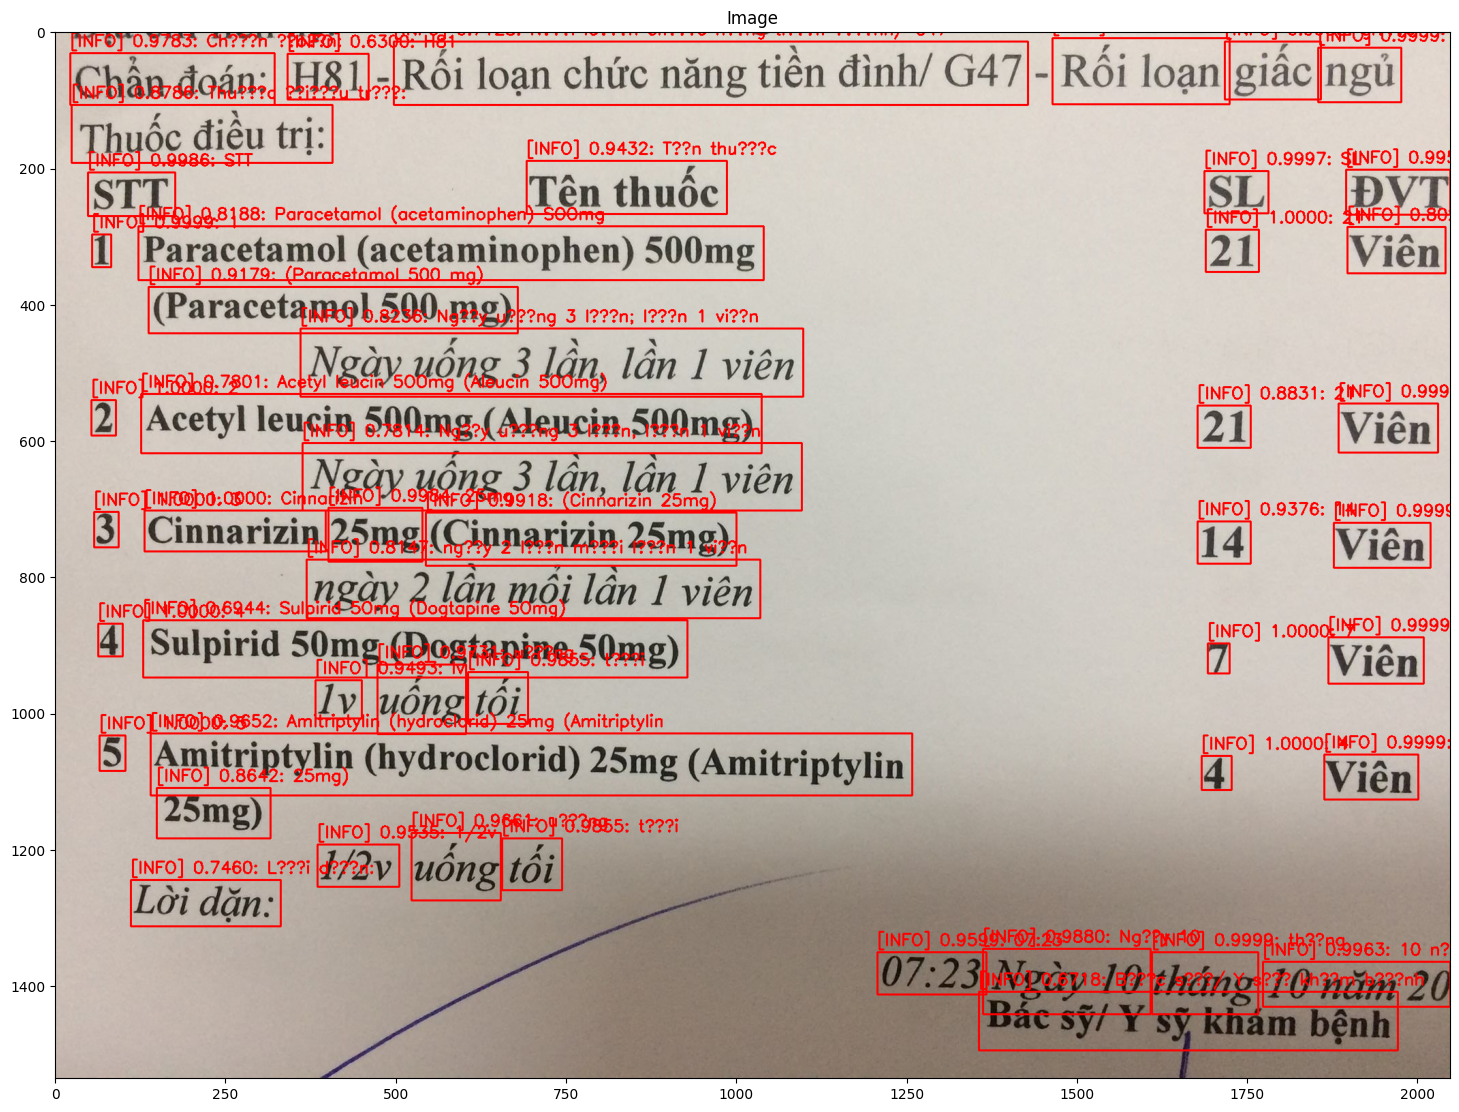

In [ ]:
import os
contrs = []
pth = f'new_imgs'
for subdir, dirs, files in os.walk(f'{pth}'):
    for f in files:
        if f.endswith('.jpg'):           
            img = cv2.imread(f'{pth}/{f}')
            results = reader.readtext(img)
            i = 0
            for (bbox, text, prob) in results:
                if prob > 0.1:
                    # display the OCR'd text and associated probability
                    print("[INFO] {:.4f}: {}".format(prob, text))

                    # unpack the bounding box
                    (tl, tr, br, bl) = bbox
                    tl = (int(tl[0]), int(tl[1]))
                    tr = (int(tr[0]), int(tr[1]))
                    br = (int(br[0]), int(br[1]))
                    bl = (int(bl[0]), int(bl[1]))
                    color = (0, 0, 255)

                    cv2.rectangle(img, tl, br, color, 2)
                    cv2.putText(img, "[INFO] {:.4f}: {}".format(prob, text), (tl[0], tl[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            


            ## Show the output image
            plt_imshow("Image", img)